# Predicting Telecom Customer Churn

The basis for this project is an IBM Sample Dataset that can be downloaded here: https://www.kaggle.com/blastchar/telco-customer-churn.  

The term "customer churn" refers to the loss of a customer. 

## Data preprocessing and exploratory data analysis

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("Telco_data.csv")

In [2]:
rows, cols = df.shape
print("The dataset has %s observations of %s variables." % (rows, cols))

The dataset has 7043 observations of 21 variables.


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


Most of the features are self-explanatory. However, a few of them could use a short clarification: 
* Partner: whether or not the customer has a partner.
* Dependents: whether or not the customer has dependents.
* tenure: number of months the customer has stayed with the company.
* contract: the contract term of the customer.
* TotalCharges: the total amount charged to the customer.
* Churn: whether or not the customer has cancelled the subscription with the company. 

In [5]:
len(df.customerID.unique()) == df.shape[0]

True

The number of unique customer ID's in the dataset is equal to the number of rows. This means that we cannot analyse the changes in a customer's behavior over time, as this is a snapshot of the customer data at a given point. Hence we cannot utilize the customerID column, and can remove it.

In [6]:
df.drop("customerID", inplace=True, axis=1)

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We expect monthly charges and total charges to be continuous variables. However, we see that TotalCharges is of type 'object'.

In [8]:
sorted(df.TotalCharges)[0:12]

[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '100.2']

Some values are empty strings, which we can consider missing values. We will take a closer look at these customers to decide how to handle it.

In [9]:
df.loc[df["TotalCharges"] == " "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


All the customers with missing values in the TotalCharges column also has tenure = 0. The tenure describes the number of momnths the customer has stayed with the company. We can conclude that the missing values are due to the customers not having payed anything to the company yet, becasue they just started their subscription. We can therefore safely impute zeros for the missing values in the TotalCharges column and convert it from 'object' to 'float'.

In [10]:
df.TotalCharges.replace(" ", 0, inplace=True)
df.TotalCharges = df.TotalCharges.astype(float)

Next, we will look at the categorical variables in the dataset. Since many of the categorical variables takes yes/no values, it could be useful to split them in "binary varaibles" and "categorical variables". We begin by looking at the unique levels of these variables.

In [11]:
# Binary variables
binary_vars = []
for col in df:
    if len(df[col].unique()) == 2:
        binary_vars.append(col)
        print(col, ": ", df[col].unique())

gender :  ['Female' 'Male']
SeniorCitizen :  [0 1]
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
PhoneService :  ['No' 'Yes']
PaperlessBilling :  ['Yes' 'No']
Churn :  ['No' 'Yes']


In [12]:
# Categorical variables
cat_vars = []
for col in df:
    if len(df[col].unique()) > 2 and df[col].dtype==object:
        cat_vars.append(col)
        print(col, ": ", df[col].unique())

MultipleLines :  ['No phone service' 'No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes' 'No internet service']
OnlineBackup :  ['Yes' 'No' 'No internet service']
DeviceProtection :  ['No' 'Yes' 'No internet service']
TechSupport :  ['No' 'Yes' 'No internet service']
StreamingTV :  ['No' 'Yes' 'No internet service']
StreamingMovies :  ['No' 'Yes' 'No internet service']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


* Because the binary variable PhoneService tells us whether or not the customer has phone service, the level "No phone service" in MultipleLines is redundant. 
* In the categorical variable InternetService, one level is "No". This makes one level reduntant in each of the six next variabels, because they alle include "No internet service", which is already accounted for. 

We can remove the mentioned redundant levels, which turns seven of the categorical variables into binary variables.

In [13]:
df.MultipleLines.replace("No phone service", "No", inplace=True)
df.OnlineSecurity.replace("No internet service", "No", inplace=True)
df.OnlineBackup.replace("No internet service", "No", inplace=True)
df.DeviceProtection.replace("No internet service", "No", inplace=True)
df.TechSupport.replace("No internet service", "No", inplace=True)
df.StreamingTV.replace("No internet service", "No", inplace=True)
df.StreamingMovies.replace("No internet service", "No", inplace=True)

In [14]:
# Update the list of binary variables
binary_vars = []
for col in df:
    if len(df[col].unique()) == 2:
        binary_vars.append(col)
        print(col, ": ", df[col].unique())

gender :  ['Female' 'Male']
SeniorCitizen :  [0 1]
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No' 'Yes']
OnlineSecurity :  ['No' 'Yes']
OnlineBackup :  ['Yes' 'No']
DeviceProtection :  ['No' 'Yes']
TechSupport :  ['No' 'Yes']
StreamingTV :  ['No' 'Yes']
StreamingMovies :  ['No' 'Yes']
PaperlessBilling :  ['Yes' 'No']
Churn :  ['No' 'Yes']


In [15]:
# Update the list of categorical variables
cat_vars = []
for col in df:
    if len(df[col].unique()) > 2 and df[col].dtype==object:
        cat_vars.append(col)
        print(col, ": ", df[col].unique())

InternetService :  ['DSL' 'Fiber optic' 'No']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


After these transformations, we are left with 14 binary variables, and three categorical variables with more than two levels. We encode the binary variables 0/1, where 'Yes' or 'Male' is 1 and 'No' or 'Female' is 0.

In [16]:
# Encoding binary variables 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df[binary_vars] = df[binary_vars].apply(lambda col: le.fit_transform(col))

# Male = 1, Female = 0
# Yes = 1, No = 0

For the categorical variables with more than two levels, we create dummy columns, which means that we create one dummy variable column for each level of the feature.

In [17]:
dummies = pd.get_dummies(df[cat_vars]).astype(int)

In [18]:
df_encoded = pd.concat(objs=(df, dummies), axis=1)

In [19]:
# df_encoded.dtypes

The remaining columns of type 'object' is now redundant, and can be removed.

In [20]:
df_encoded.drop(df.select_dtypes(['object']), inplace=True, axis=1) # dropping old categorical columns

In [21]:
df_encoded.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

We now have one column for each level of the three categorical variables InternetService, Contract and PaymentMethod. For each of these variables, we will have to remove one column, because it will be exatly multicollinear to the rest of the columns referring to the same variable. As an example, the column Contract_Month-to-month will be an exact linear combination of the columns Contract_One year and Contract_Two year. We could have specified that we wanted to remove one column in the get_dummies() function used above, but we wanted to choose which levels to remove.

We choose to drop the following columns, one for each categorical variable:

In [22]:
df_encoded.drop(labels=["InternetService_No", "Contract_Month-to-month", "PaymentMethod_Bank transfer (automatic)"], axis=1, inplace=True)

In [23]:
df_encoded.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

We clean up the colum names for easier use later. We also place the "churn" column last in the dataframe, to separate it from the independent variables. Finally, we save the preprocessed dataset to file.

In [24]:
# Cleaning up column names
clean_cols = ["gender", "senior", "partner", "dependents", "tenure", "phone", "multiple_lines", "online_security", "online_backup",
              "device_protection", "tech_support", "streaming_tv", "streaming_movies", "paperless_billing", "monthly_charges",
              "total_charges", "churn", "internet_dsl", "internet_fiber", "contract_1_yr",
              "contract_2_yr", "payment_credit_card", "payment_electronic_check", "payment_mailed_check"]
df_encoded.columns = clean_cols

In [25]:
churn_col = df_encoded.churn
df_encoded.drop("churn", axis=1, inplace=True)
df_encoded["churn"] = churn_col

In [26]:
df_encoded.to_csv("telco_preprocessed.csv")

**Splitting the dataset in 80/20 train/test for later use in prediction**

In [ ]:
# splitting the dataset in 80/20 train/test
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_encoded, test_size=0.2, random_state=42)

In [ ]:
# saving train/test split
df_train.to_csv("telco_train.csv")
df_test.to_csv("telco_test.csv")

## Data Exploration

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
df = pd.read_csv("telco_preprocessed.csv", index_col=0)

In [29]:
rows, cols = df.shape
print("After preprocessing, the dataset has %s observations of %s variables." % (rows, cols))

After preprocessing, the dataset has 7043 observations of 24 variables.


In [30]:
df.describe().iloc[:,0:12]
df.describe().iloc[:,12:]

,streaming_movies,paperless_billing,monthly_charges,total_charges,internet_dsl,internet_fiber,contract_1_yr,contract_2_yr,payment_credit_card,payment_electronic_check,payment_mailed_check,churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.387903,0.592219,64.761692,2279.734304,0.343746,0.439585,0.209144,0.240664,0.216101,0.335794,0.228880,0.265370
std,0.487307,0.491457,30.090047,2266.794470,0.474991,0.496372,0.406726,0.427517,0.411613,0.472301,0.420141,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,35.500000,398.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,70.350000,1394.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,89.850000,3786.600000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* No missing values for any columns (other than the ones we imputed in the preprocessing step)
* No sign of extreme or counterintuitive values (like negative charges, etc.).

In [31]:
churn_rate = np.mean(df.churn)*100
print("The overall churn rate is {:.2f}%".format(churn_rate))

The overall churn rate is 26.54%


In [32]:
# churn_plot = sns.barplot(x="churn", y="churn", data=df, 
#                          estimator=(lambda x: len(x)/len(df)*100),
#                          orient="h")
# churn_plot.set(xlabel="Percent of total observations", ylabel="", yticklabels=["No churn", "Churn"])
# plt.show()

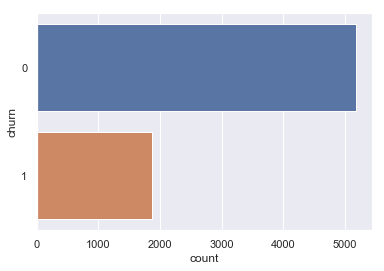

In [33]:
sns.set(style="darkgrid")
ax = sns.countplot(y="churn", data=df)

There is a clear class imbalance in the dependent variable churn, which is something we need to take into account when building a classification model.

### PCA
The dataset currently consist of 23 predictors and 1 dependent variable. We can perform a dimensionality reduction using PCA in an attempt to visualize the data.

In [34]:
# Scaling the predictors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

y = df.churn.values
X = df.drop(labels = "churn", axis=1).values

X = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ["PC1", "PC2"])

In [35]:
finalDf = pd.concat([principalDf, df.churn], axis=1)

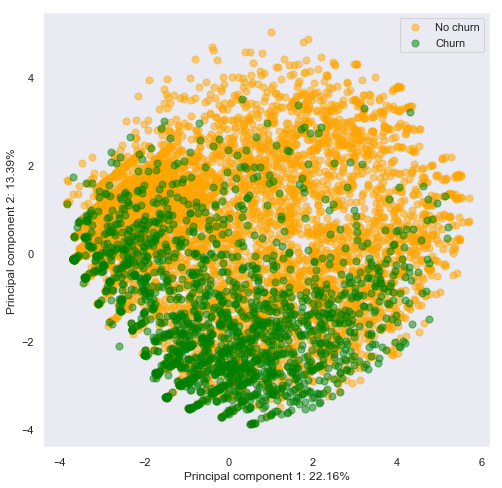

In [36]:
# Plotting the first two dimensions of the PCA
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

dims = pca.explained_variance_ratio_
ax.set_xlabel("Principal component 1: " + (round(dims[0]*100,2).astype(str) + "%"))
ax.set_ylabel("Principal component 2: " + (round(dims[1]*100,2).astype(str) + "%"))

target = [0, 1]
colors = ('orange', 'green')
for target, color in zip(target, colors):
    indicesToKeep = finalDf.churn == target
    ax.scatter(finalDf.loc[indicesToKeep, "PC1"], 
               finalDf.loc[indicesToKeep, "PC2"], 
               c = color, 
               s = 50,
               alpha = 0.5)

ax.legend(["No churn", "Churn"])
ax.grid()

The first two principal components explain around 35% of the variance in the dataset. Even though the two classes overlap heavily, we can clearly see that the majority of the "churn" observations are located in the lower part of the point cloud. Based on this, accurately predicting "no churn" for some observations will be possible, because parts of the observations are fairly well separated from the "churn" observations. Accurately classifying observations located in the area with heavy overlap will be harder.

### A closer look the customers grouped by churn/no churn

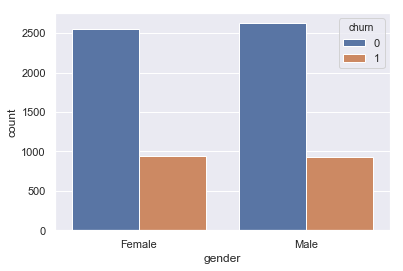

In [37]:
sns.set(style="darkgrid")
gender = sns.countplot(x="gender", hue="churn", data=df)
gender.set(xticklabels=["Female", "Male"])
plt.show()

In [38]:
binary_cols = []
for col in df.columns.values[1:16]:
    if (len(df[col].unique()) == 2) and (col != "churn"):
        binary_cols.append(col)
len(binary_cols)

12

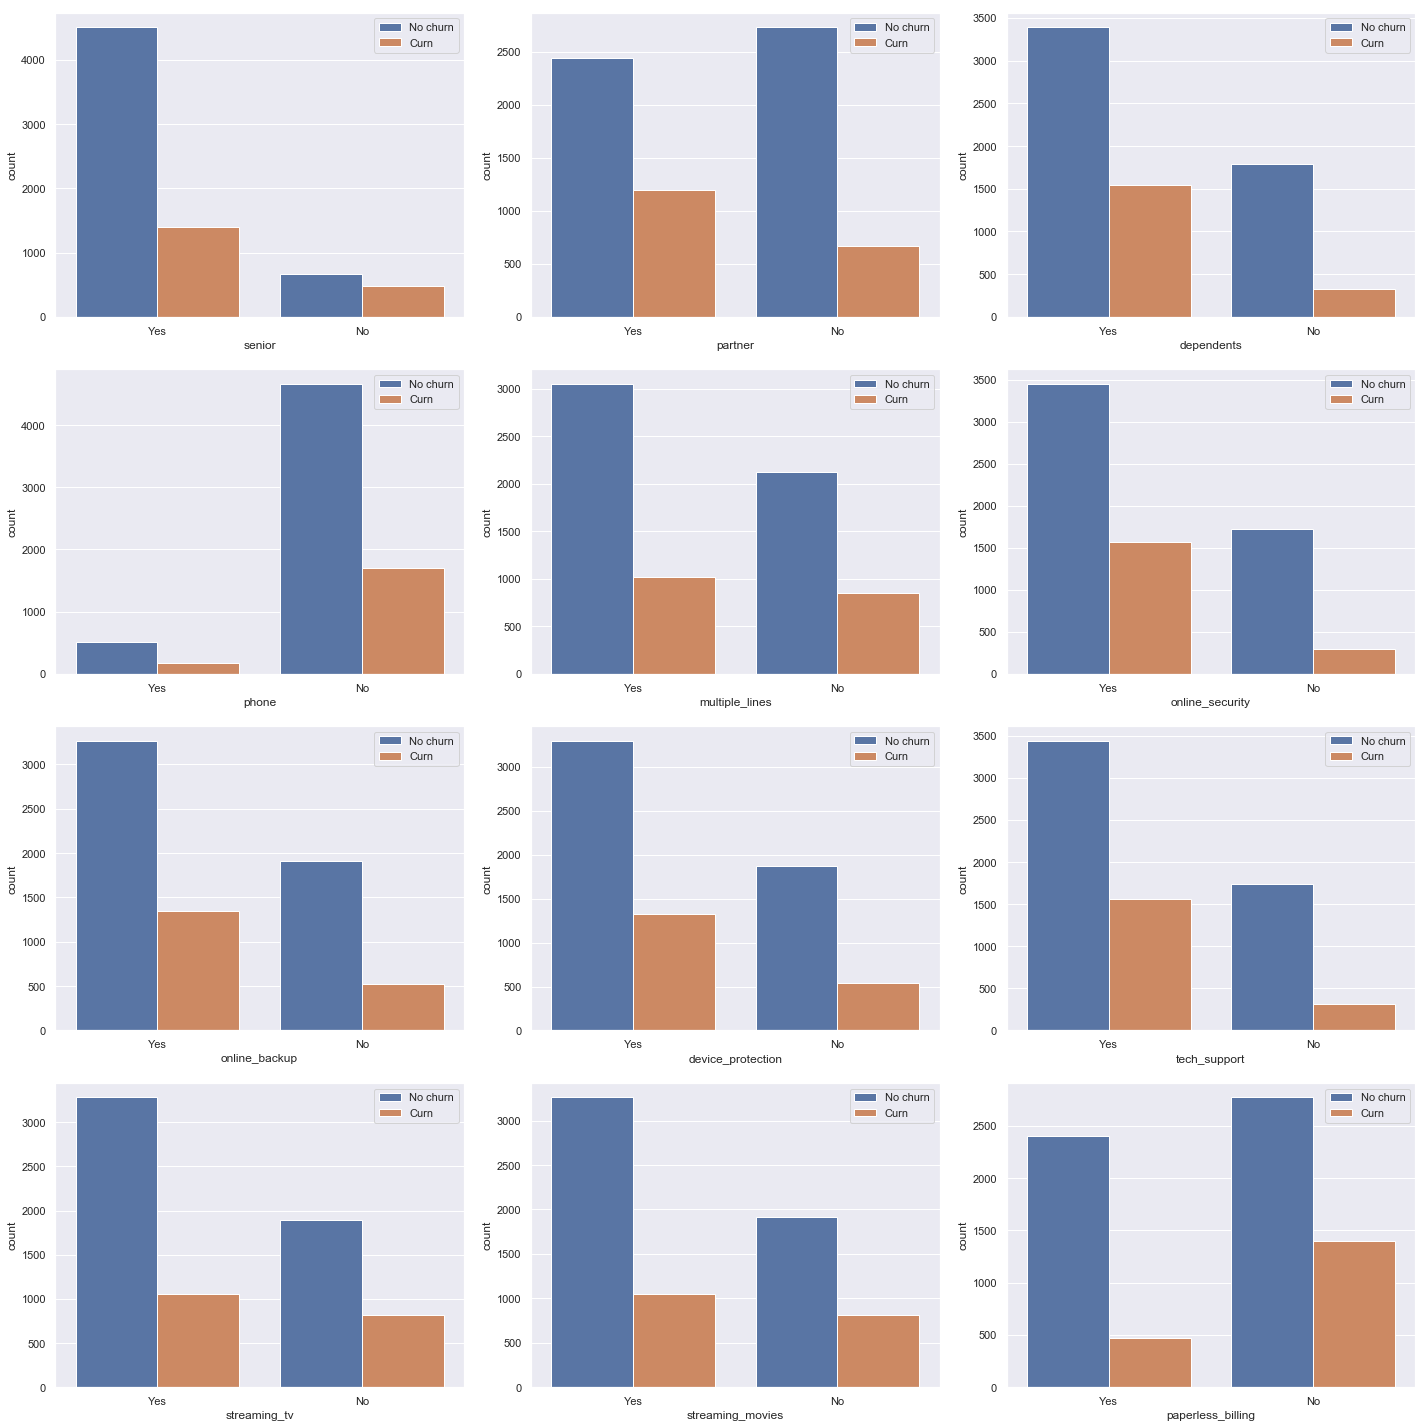

In [39]:
fig, axes = plt.subplots(4, 3, figsize=(20,20))
axes = axes.flatten()
for ax, col in zip(axes, binary_cols): 
    sns.countplot(x=col, data=df, ax=ax, hue="churn")
    ax.set_xticklabels(labels=["Yes", "No"])
    ax.legend(labels=["No churn", "Curn"])

plt.tight_layout()
plt.show()

### Correlation matrix and pair plots

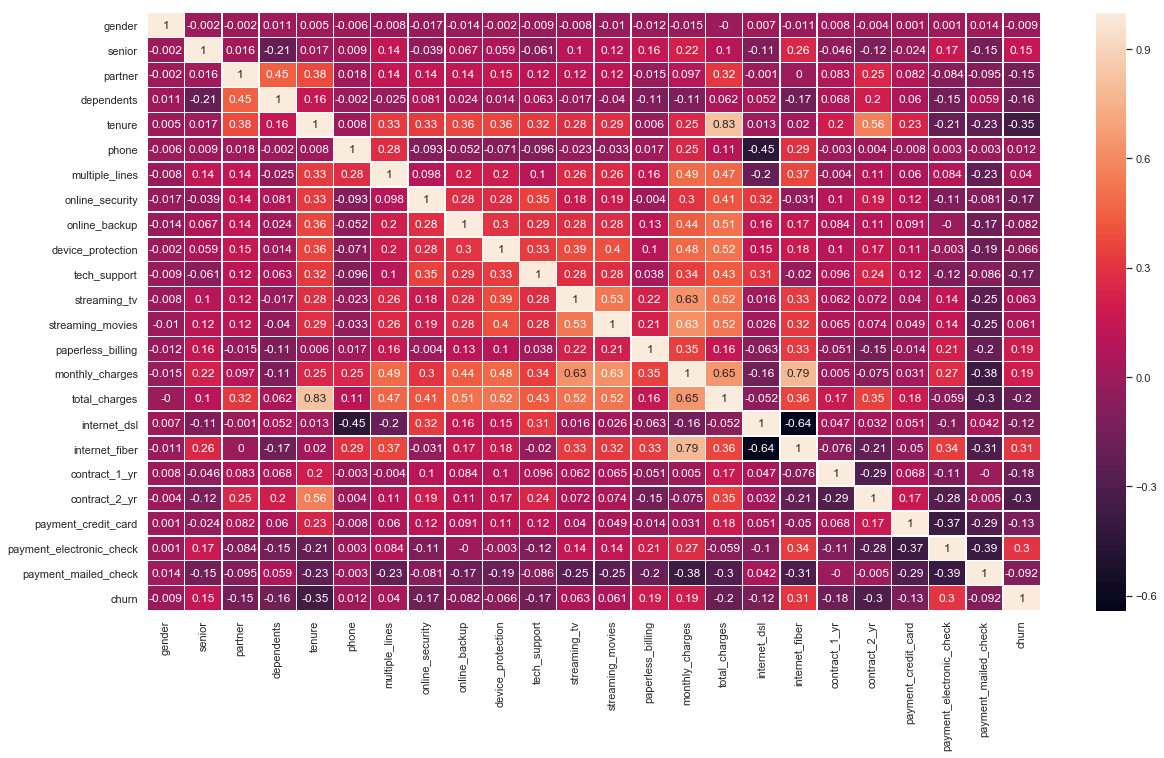

In [40]:
import seaborn as sns

corr = round(df.corr(), 3)

fig, ax = plt.subplots(figsize=(20,11))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)
plt.show()

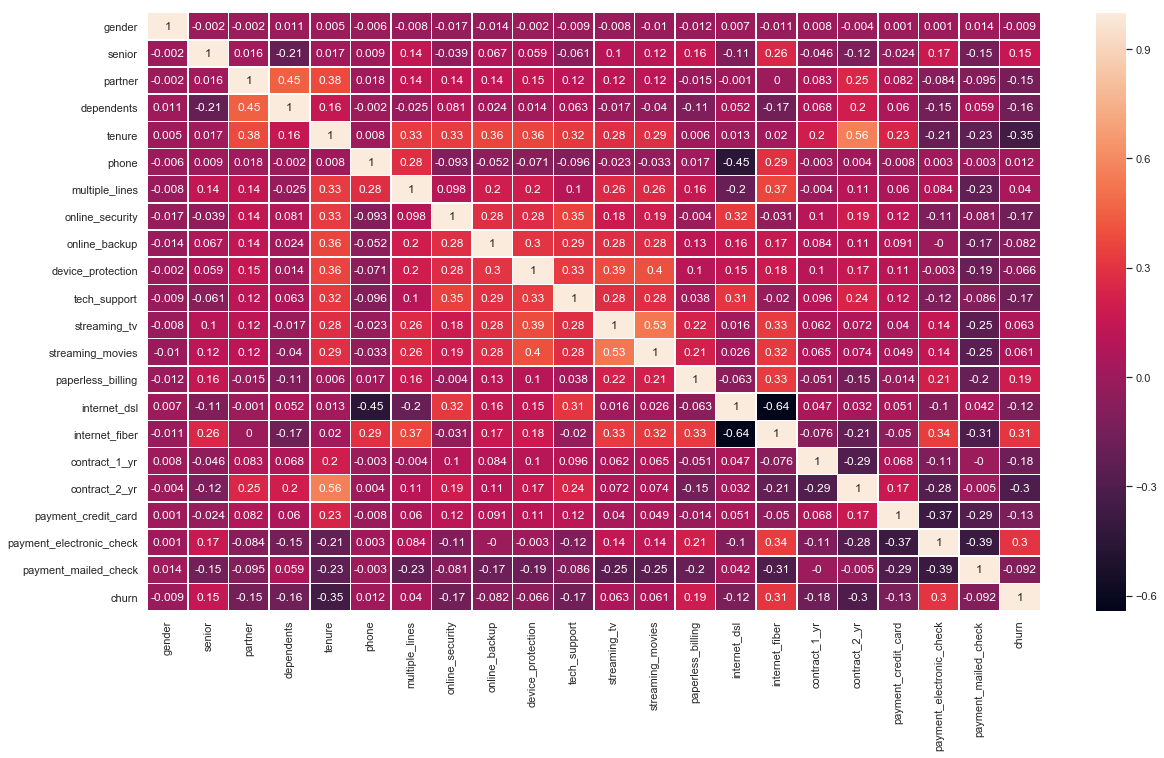

In [41]:
corr_cat = round(df.drop(labels=["monthly_charges", "total_charges"], axis=1).corr(), 3)

fig, ax = plt.subplots(figsize=(20,11))
sns.heatmap(corr_cat, annot=True, linewidths=.5, ax=ax)
plt.show()

### Closer look at the quantitative variables

In [42]:
quant_vars = []
for col in df: 
    if df[col].nunique() > 2: 
        quant_vars.append(col)
        
quant_data = df[quant_vars + ["churn"]]

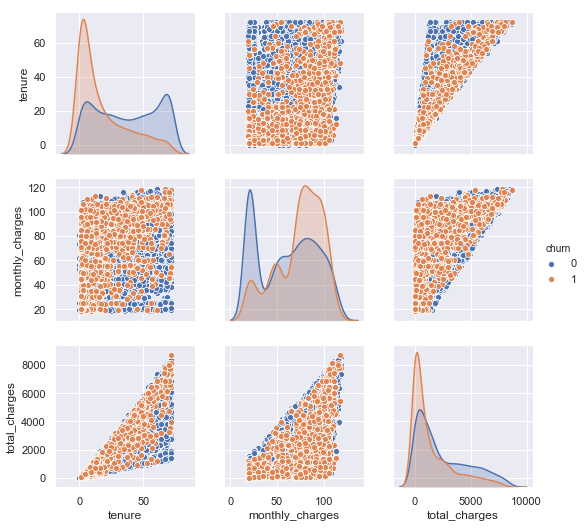

In [48]:
sns.pairplot(data=quant_data, vars=quant_vars, hue="churn")
plt.show()